In [1]:
import numpy as np 
import pandas as pd
import os

In [176]:
train = pd.read_csv("./data/train.csv")
train = pd.DataFrame(train)
demo = train.get("class")
#demo.split()
#print(train)
train_article = train.loc[:,['article','class']]

In [200]:
high_word_list = pd.read_csv("./data/book/high_word_list.csv",names=["words"])
middle_word_list = pd.read_csv("./data/book/middle_word_list.csv",names=["words"])
dic_freq = Counter(high_word_list["words"])

dic_word = tuple2word(dic_freq.most_common())
dic_word_20 = tuple2word(dic_freq.most_common(20))


In [201]:
from collections import Counter
def tuple2word(dic_most):
    tmp = []
    for i in dic_most:
        tmp.append(i[0])
    return tmp
#生成词频统计
def prepare_word(all_dic):
    dic = []
    dic_freq_10 = set(tuple2word(Counter(all_dic).most_common(10)))
    specil_word = {'and','the','with','in','by','its','for','of','an','to','adj','n','pron','adv','conj','vt','vi','prep'}
    specil_word.update(dic_freq_10)
    #print(specil_word)
    for word in set(all_dic):
        if word not in specil_word:
            dic.append(word)
        else:
            continue
    return dic

dic_h = prepare_word(high_word_list["words"])
dic_m = prepare_word(middle_word_list["words"])
print(len(dic_h),len(dic_m))

4112 2896


In [254]:
for word in dic_m:
    if word in dic_h:
        dic_h.remove(word)
print(len(dic_h),len(dic_m))

2709 2896


In [255]:
#five_dic_1
def mh_ratio(demo):
    txt = demo.split()
    new_dic_0 = []
    new_dic_1 = []
    for w in set(txt):
        if w in dic_h:
            new_dic_0.append(w)
        if w in dic_m:
            new_dic_1.append(w)
    #print(len(new_dic_0)/(len(new_dic_0)+len(new_dic_1)))
    return len(new_dic_0)/(len(new_dic_0)+len(new_dic_1))#大于0.5属于初中 小于0.5属于高中

In [256]:
h_f = []
m_f = []
for index, row in train_article.iterrows():
    article_score = mh_ratio(row.get("article"))
    if index %1000 == 0:
        print("index:",index)
    if row.get("class") == "high":
        h_f.append(article_score)
    if row.get("class") == "middle":
        m_f.append(article_score)

index: 0
index: 1000
index: 2000
index: 3000
index: 4000
index: 5000
index: 6000
index: 7000
index: 8000
index: 9000
index: 10000
index: 11000
index: 12000
index: 13000
index: 14000
index: 15000
index: 16000
index: 17000
index: 18000
index: 19000
index: 20000
index: 21000
index: 22000
index: 23000


ZeroDivisionError: division by zero

In [252]:
print(min(m_f),max(m_f),sum(m_f)/len(m_f),len(m_f),np.mean(m_f),np.std(m_f))
a = np.mean(m_f)
b = np.std(m_f)
m_f_s = []
for i in m_f:
    m_f_s.append((i- a)/b)
print(min(h_f),max(h_f),sum(h_f)/len(h_f),len(h_f),np.mean(h_f),np.std(h_f))
a = np.mean(h_f)
b = np.std(h_f)
h_f_s = []
for i in h_f:
    h_f_s.append((i- a)/b)


0.07142857142857142 0.5 0.2803147848937072 5236 0.2803147848937076 0.04979700984088811
0.0 0.5454545454545454 0.33493985326515613 18728 0.33493985326515774 0.04572815474382353


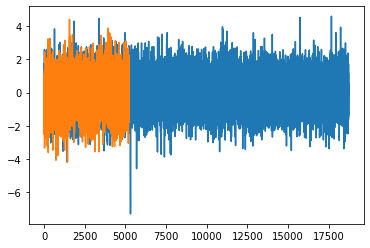

In [253]:
plt.plot(h_f_s)
plt.plot(m_f_s)